## Setup

In [1]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency, calculate_poisson_predictions, calculate_negative_binomial_predictions, format_prediction_table, get_phrases, process_json
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [31]:
PHRASES = get_phrases("KXTNFMENTION-25OCT02") + ['baseball', 'dodgers']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'Down to the wire': "\\b(?:\\w+-)*(?:down[\\s,\\-]+to[\\s,\\-]+the[\\s,\\-]+wire|down[\\s,\\-]+to[\\s,\\-]+the[\\s,\\-]+wires|down[\\s,\\-]+to[\\s,\\-]+the[\\s,\\-]+wire's|down[\\s,\\-]+to[\\s,\\-]+the[\\s,\\-]+wires'|down[\\s,\\-]+to[\\s,\\-]+thes[\\s,\\-]+wire|down[\\s,\\-]+to[\\s,\\-]+thes[\\s,\\-]+wires|down[\\s,\\-]+to[\\s,\\-]+thes[\\s,\\-]+wire's|down[\\s,\\-]+to[\\s,\\-]+thes[\\s,\\-]+wires'|down[\\s,\\-]+to[\\s,\\-]+the's[\\s,\\-]+wire|down[\\s,\\-]+to[\\s,\\-]+the's[\\s,\\-]+wires|down[\\s,\\-]+to[\\s,\\-]+the's[\\s,\\-]+wire's|down[\\s,\\-]+to[\\s,\\-]+the's[\\s,\\-]+wires'|down[\\s,\\-]+to[\\s,\\-]+thes'[\\s,\\-]+wire|down[\\s,\\-]+to[\\s,\\-]+thes'[\\s,\\-]+wires|down[\\s,\\-]+to[\\s,\\-]+thes'[\\s,\\-]+wire's|down[\\s,\\-]+to[\\s,\\-]+thes'[\\s,\\-]+wires'|down[\\s,\\-]+tos[\\s,\\-]+the[\\s,\\-]+wire|down[\\s,\\-]+tos[\\s,\\-]+the[\\s,\\-]+wires|down[\\s,\\-]+tos[\\s,\\-]+the[\\s,\\-]+wire's|down[\\s,\\-]+tos[\\s,\\-]+the[\\s,\\-]+wires'|down[\\s,\\-]+tos[\\s,\\-]+thes[\

In [45]:
# Process transcripts

df = process_directory('../data-football/tnf/processed-captions', SEARCH_PHRASES)

# Print dataset statistics
print("Dataset Statistics:")

print(f"\nAll Transcripts:")
print(f"Total: {len(df)}")

print("\nWord Count Statistics:")

print(f"\nAll Transcripts:")
print(f"Average length: {df['text_length'].mean():.0f} words") 


print("\nDate Ranges:")

print(f"\nAll Transcripts:")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")


Categories found in directory:
- processed-captions
Dataset Statistics:

All Transcripts:
Total: 42

Word Count Statistics:

All Transcripts:
Average length: 17332 words

Date Ranges:

All Transcripts:
Date range: 2022-09-15 to 2025-09-25


In [33]:
df_nfl = process_json('../data-football/older-games/nfl.json', SEARCH_PHRASES)
df_nfl = df_nfl.sort_values('date')
len(df_nfl)

601

In [34]:
nfl_recent = df_nfl[df_nfl['date'] > datetime(2015, 1, 1)]
len(nfl_recent)

208

## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)


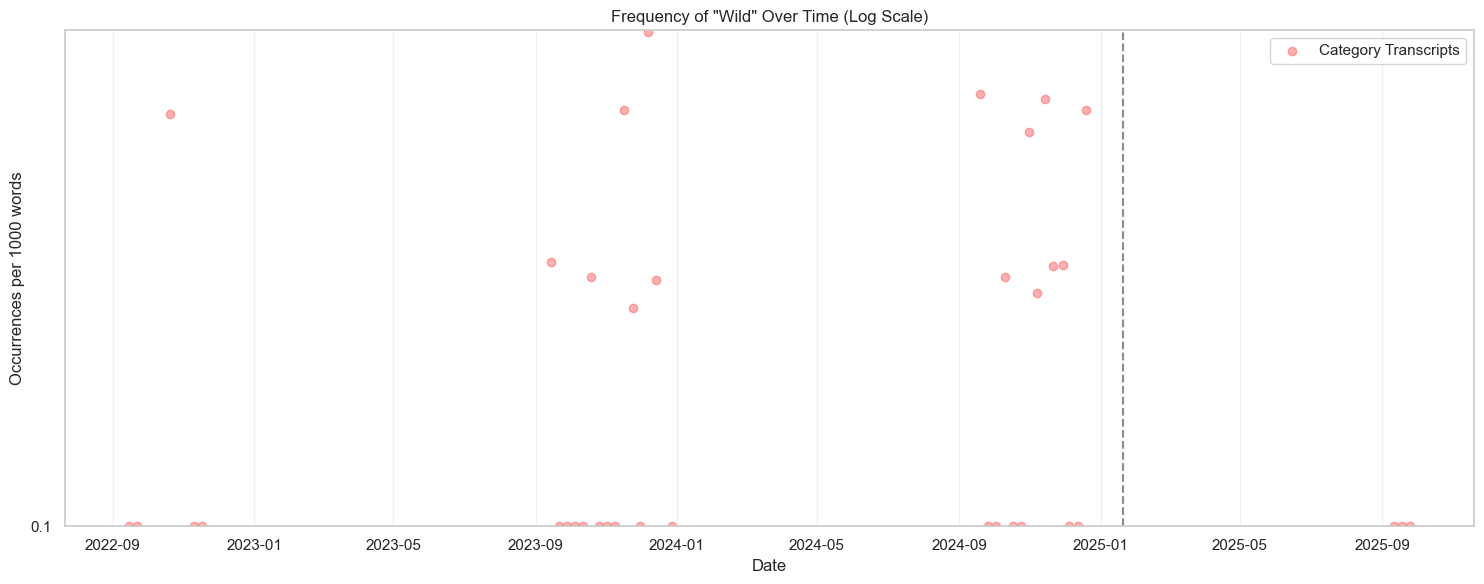


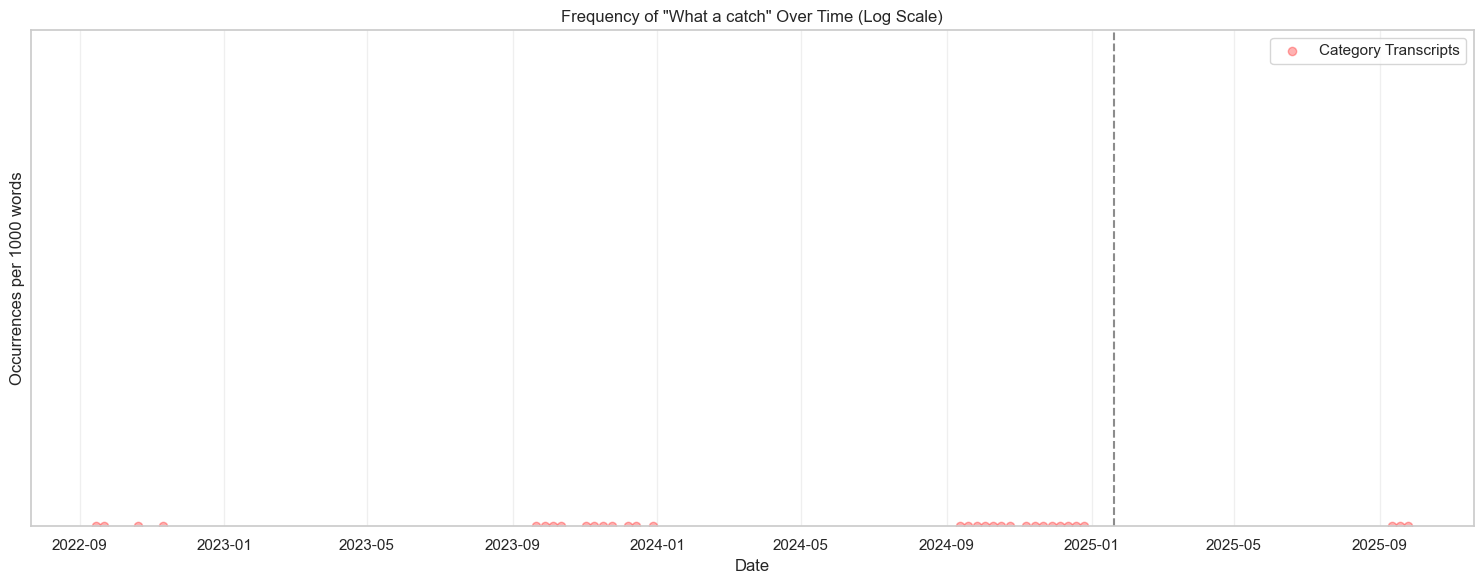


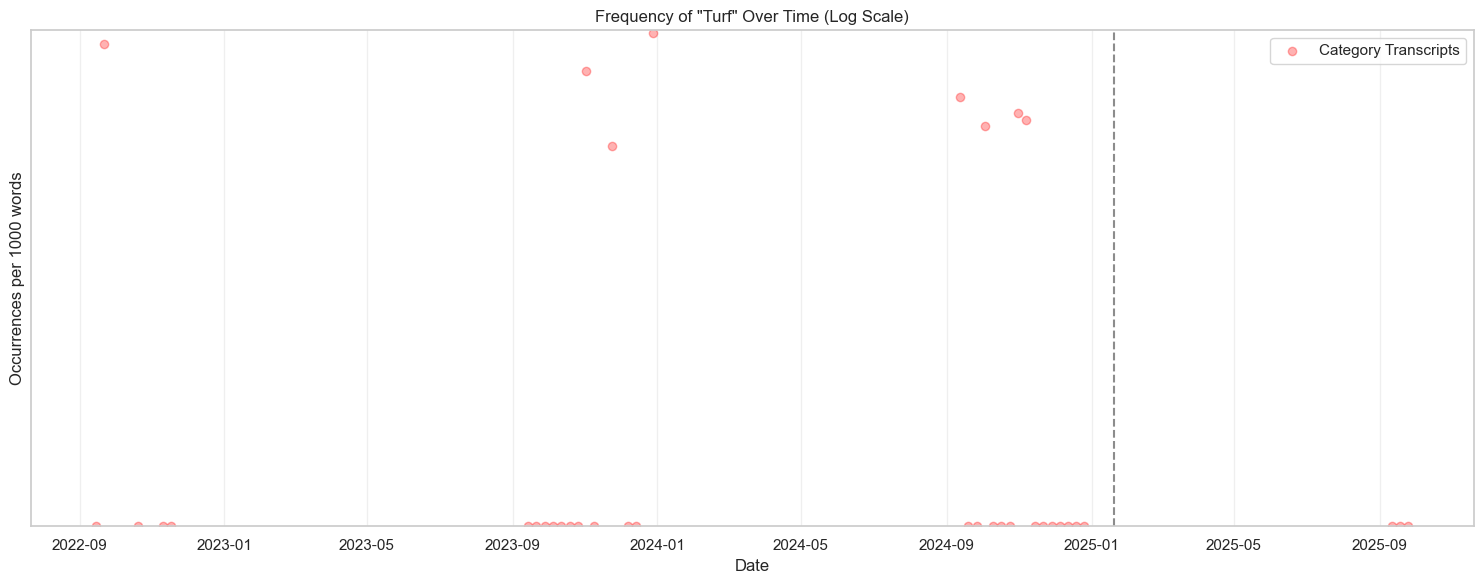


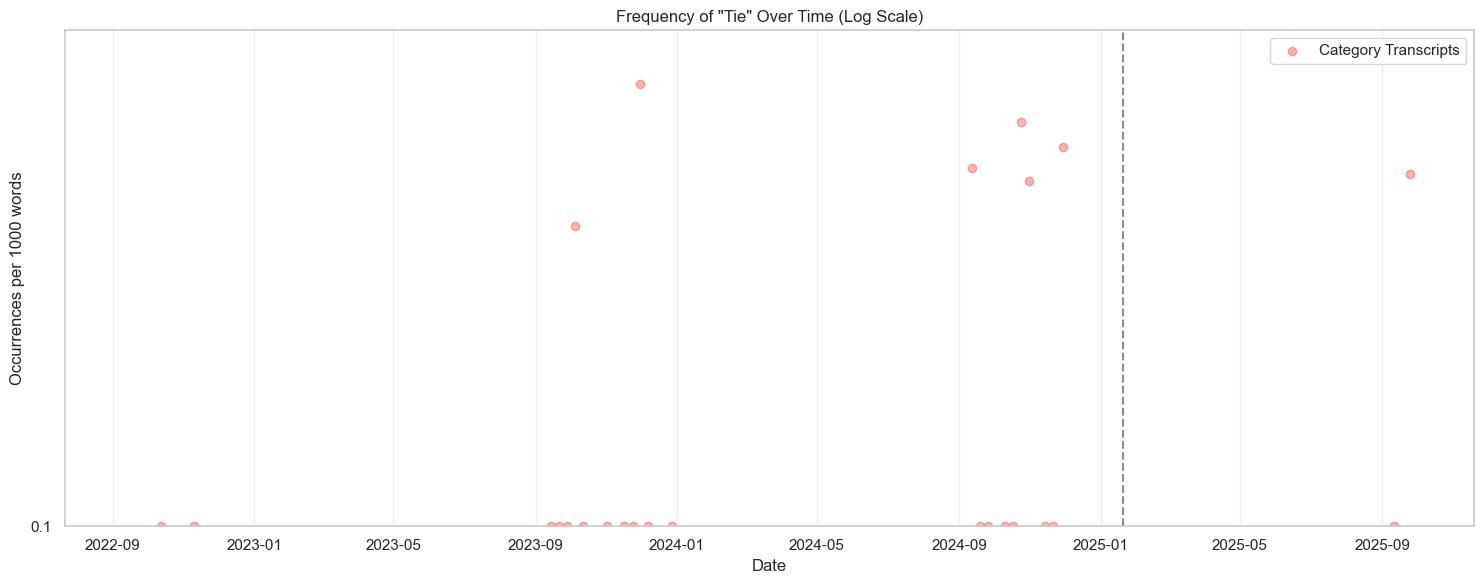


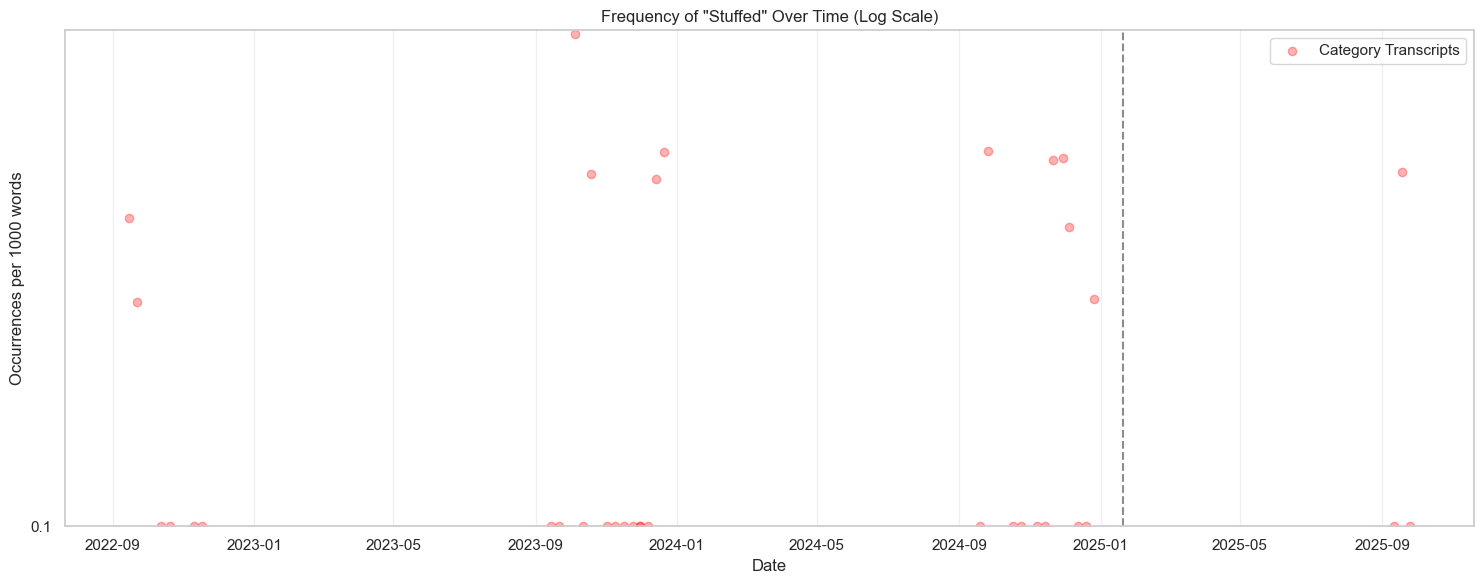


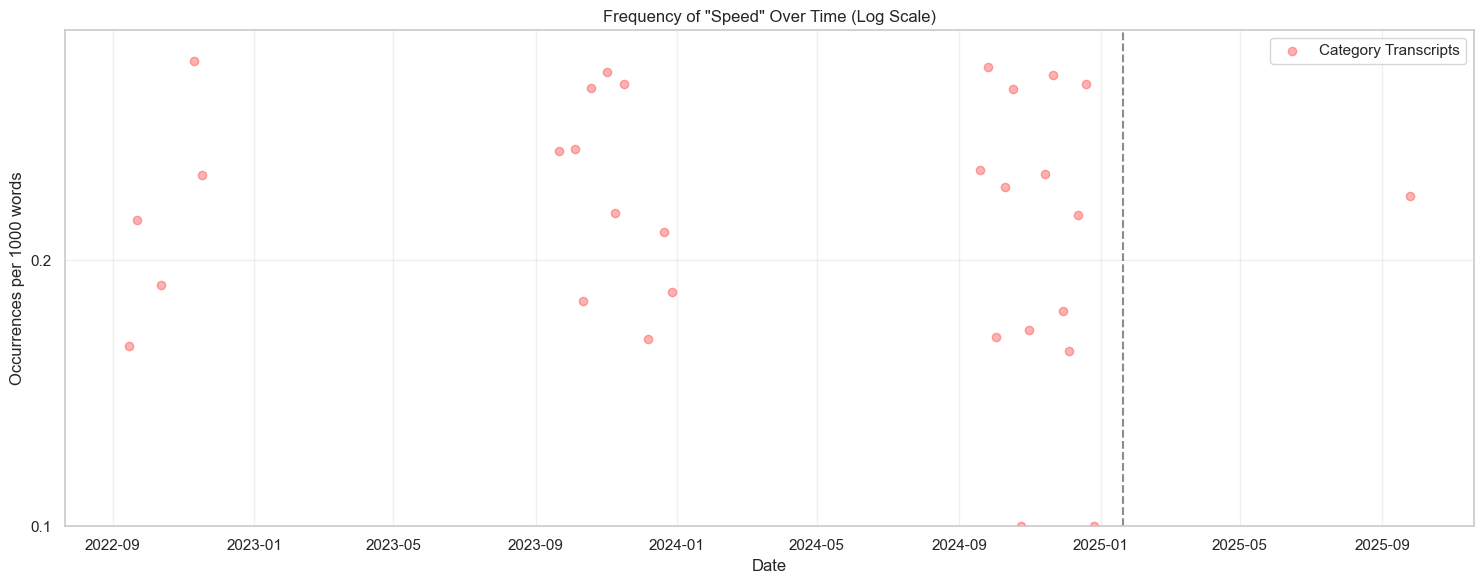


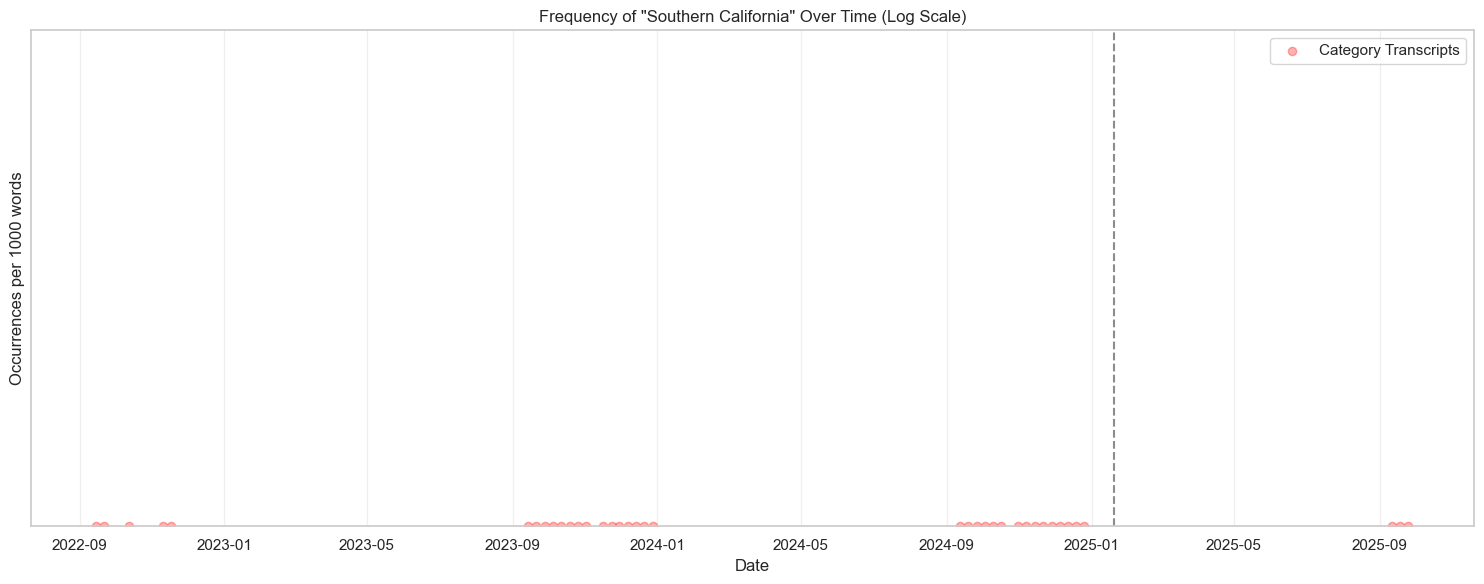


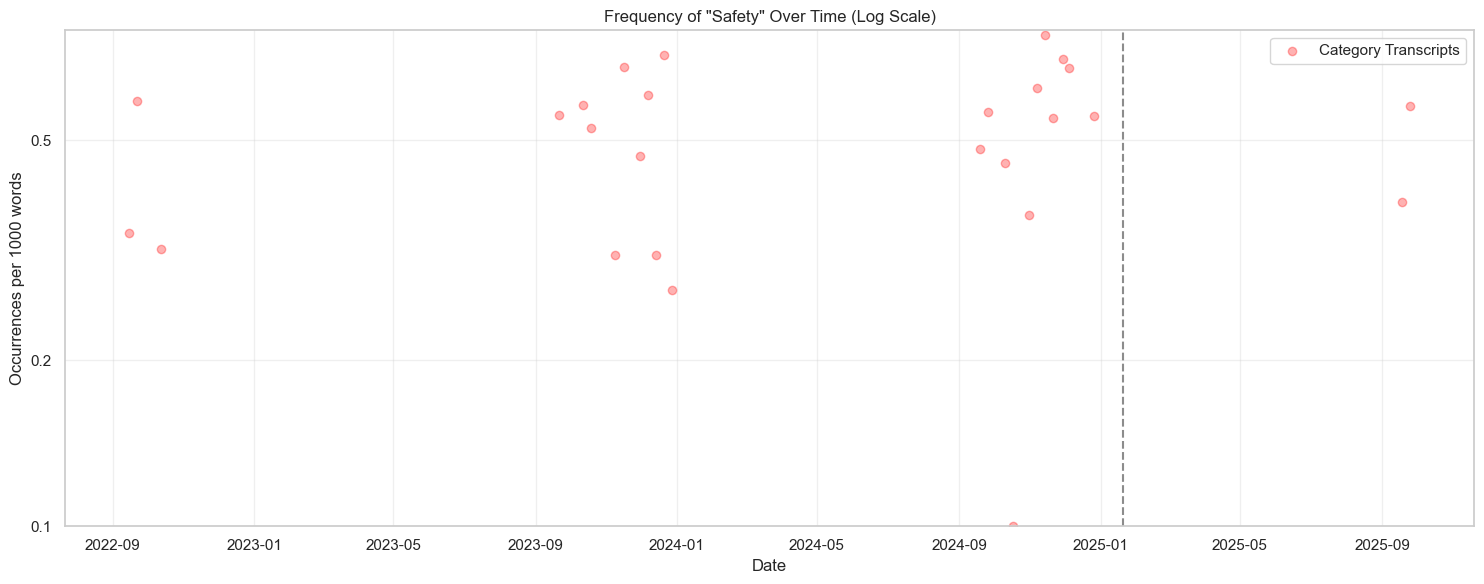


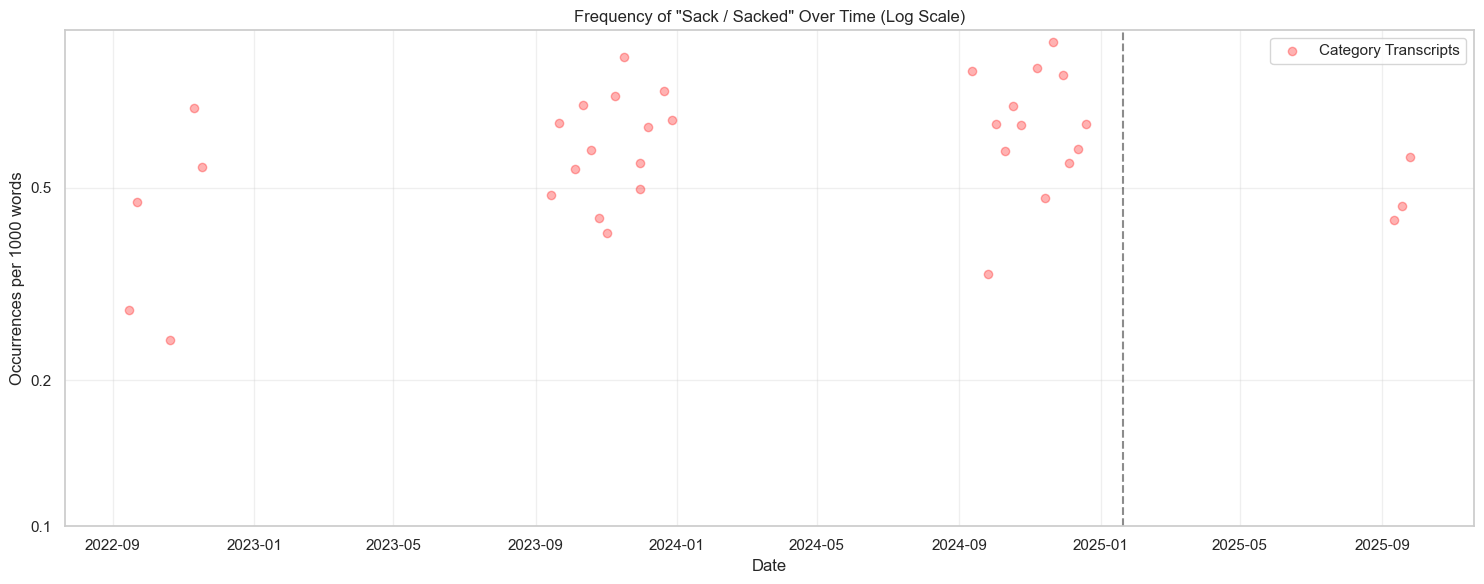


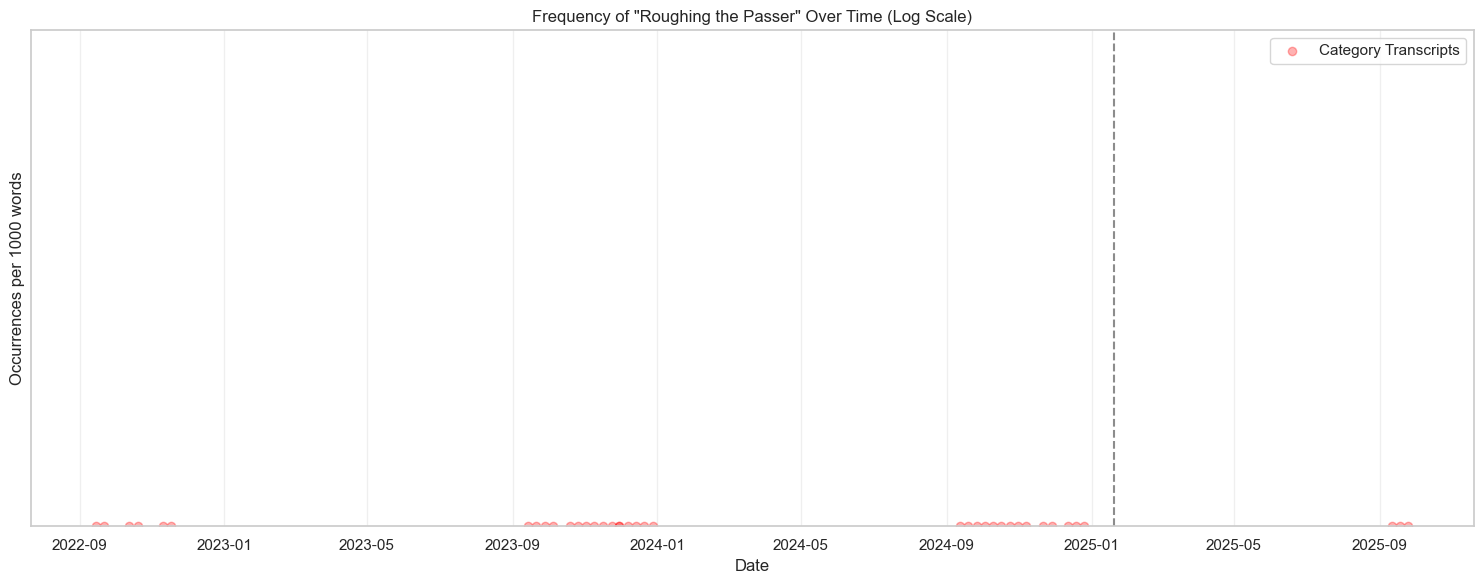


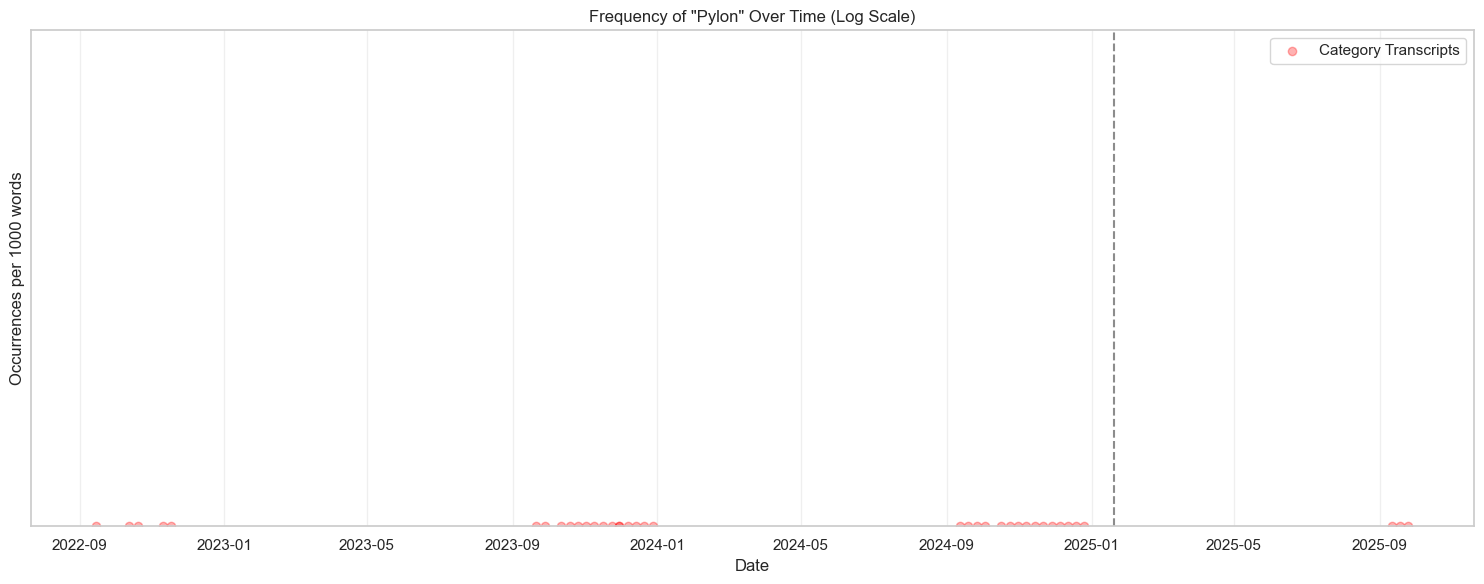


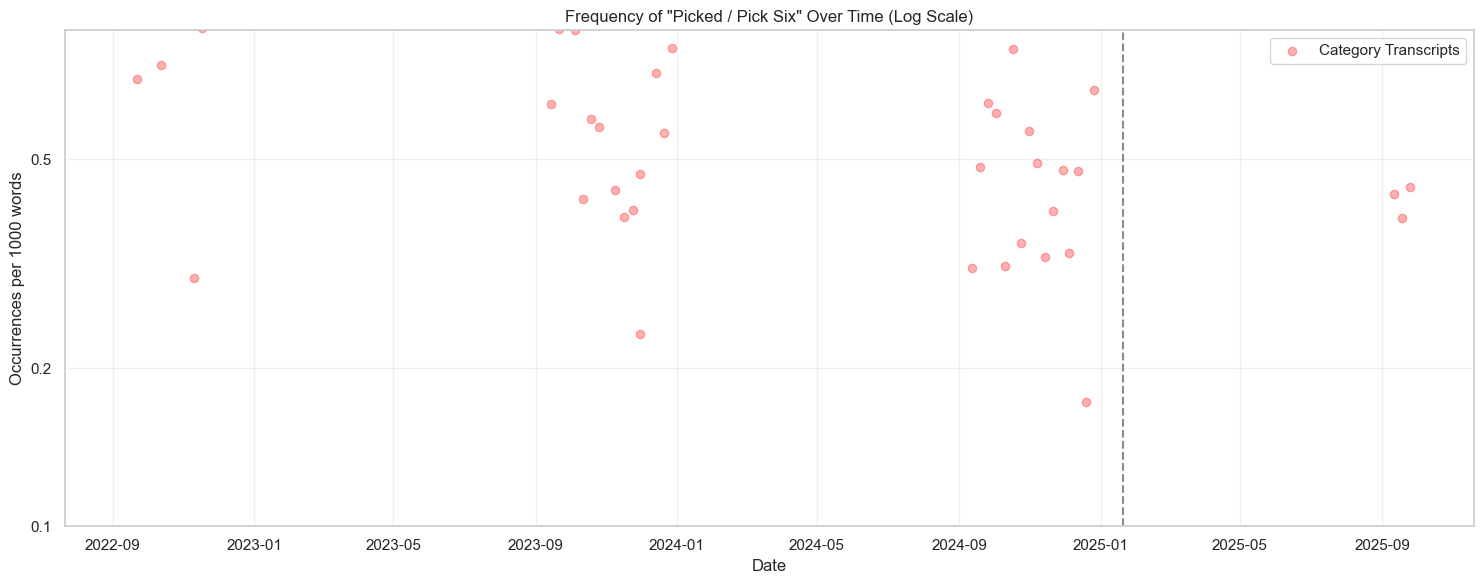


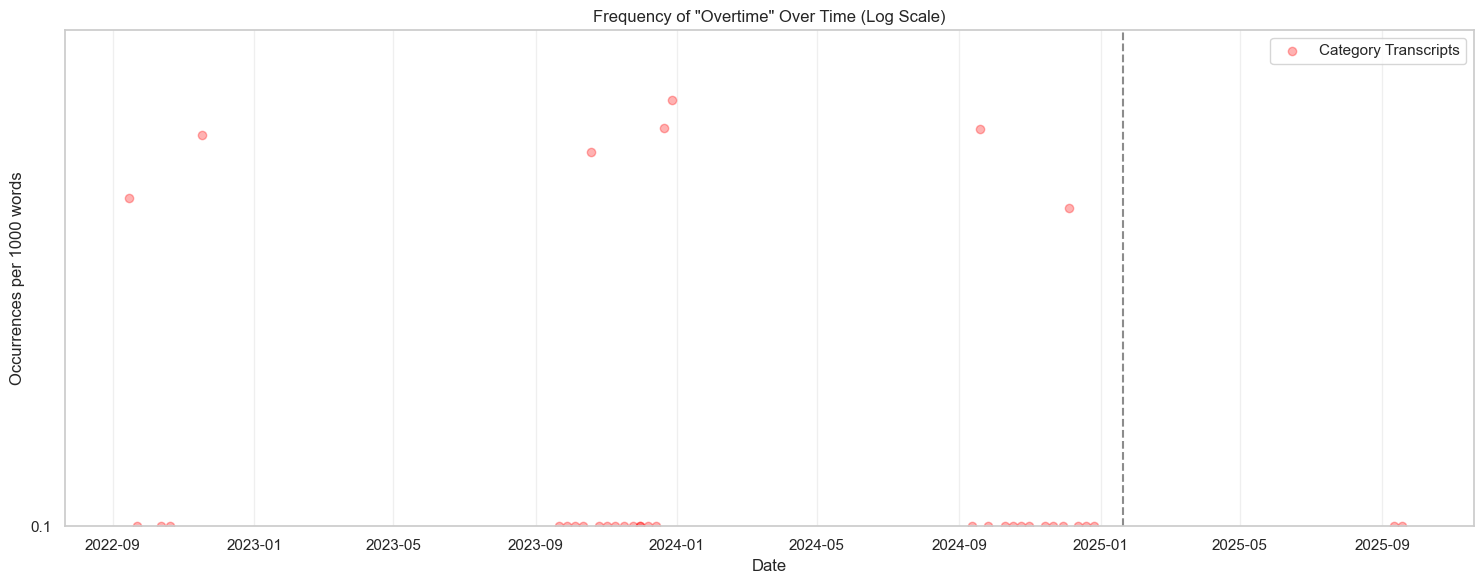


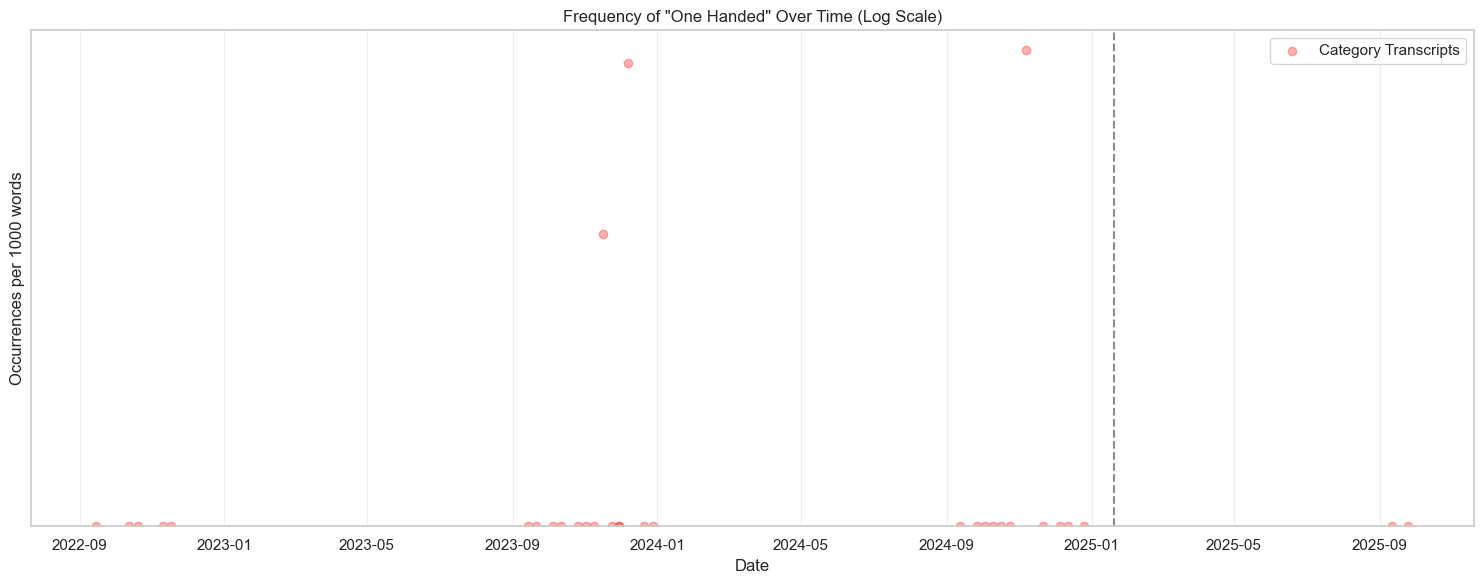


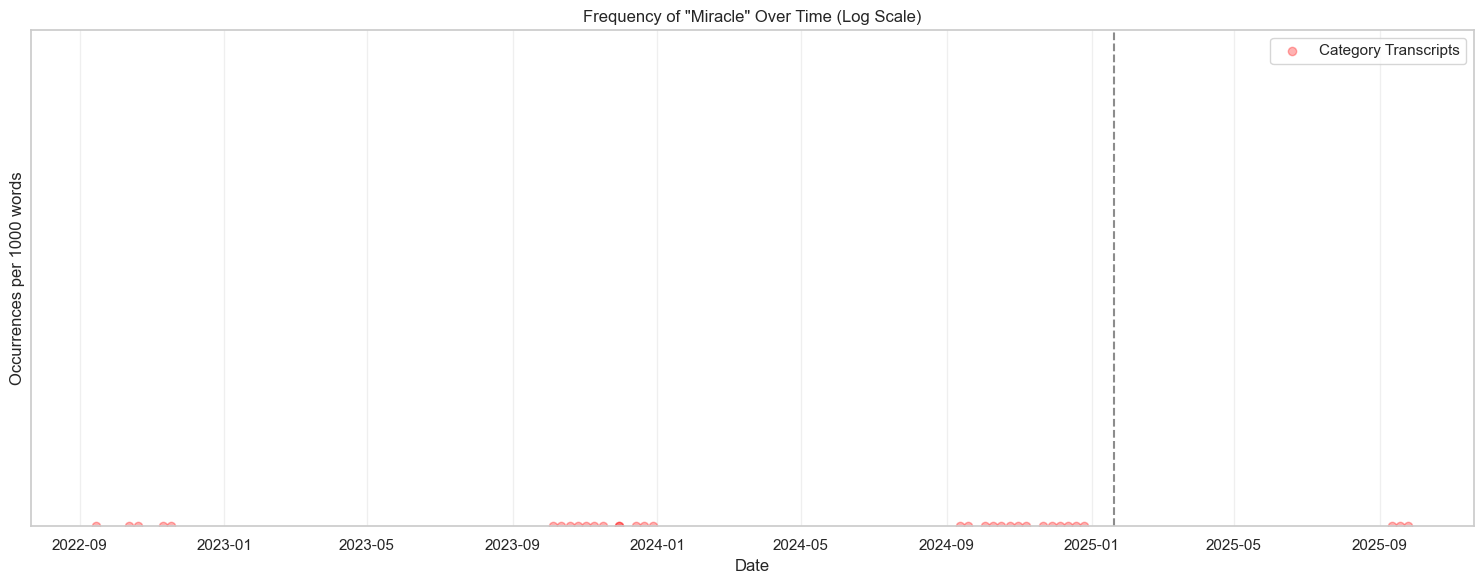


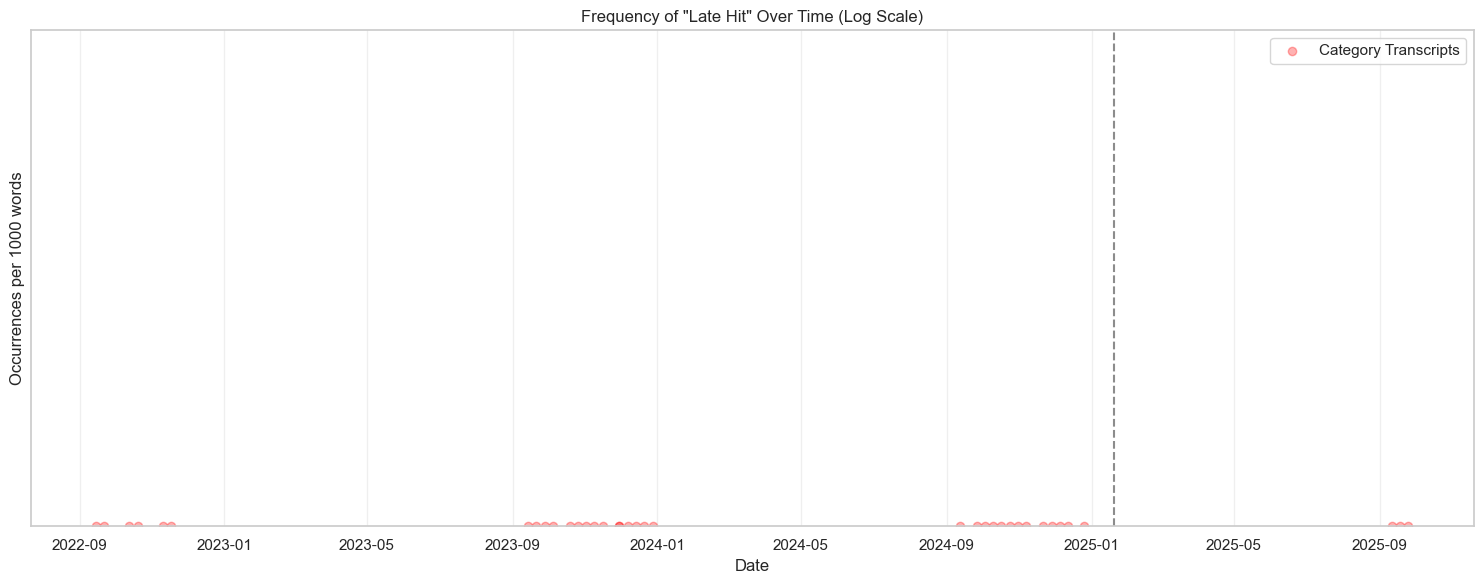


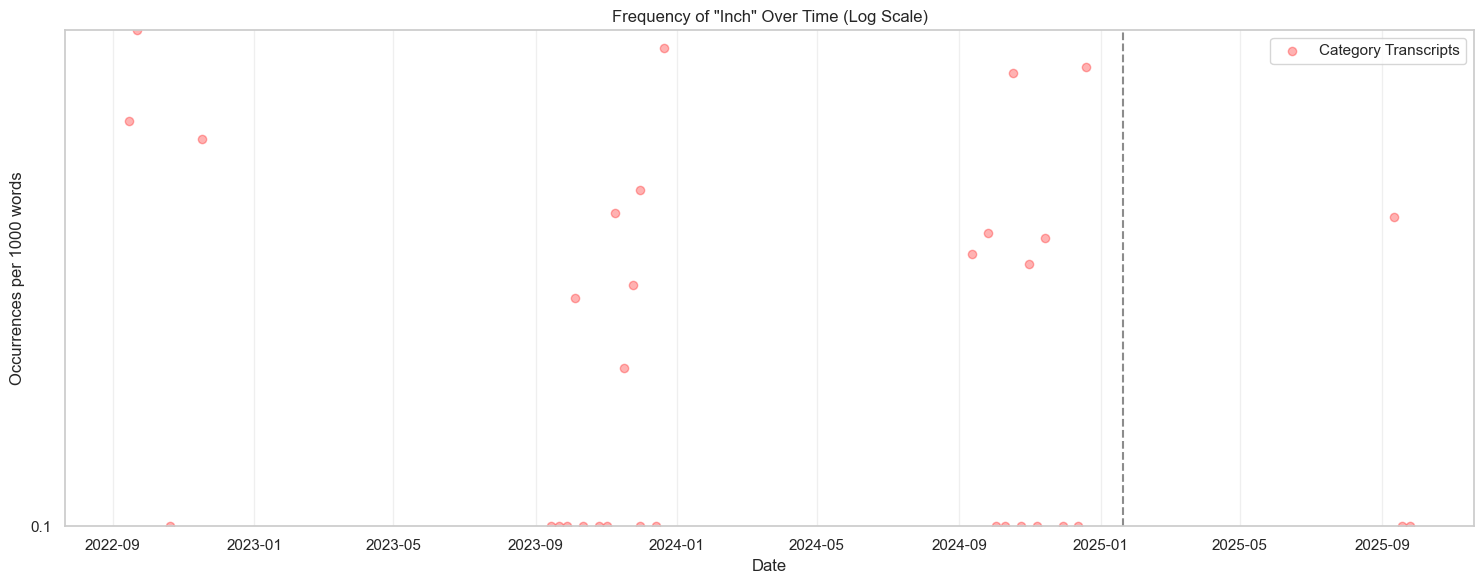


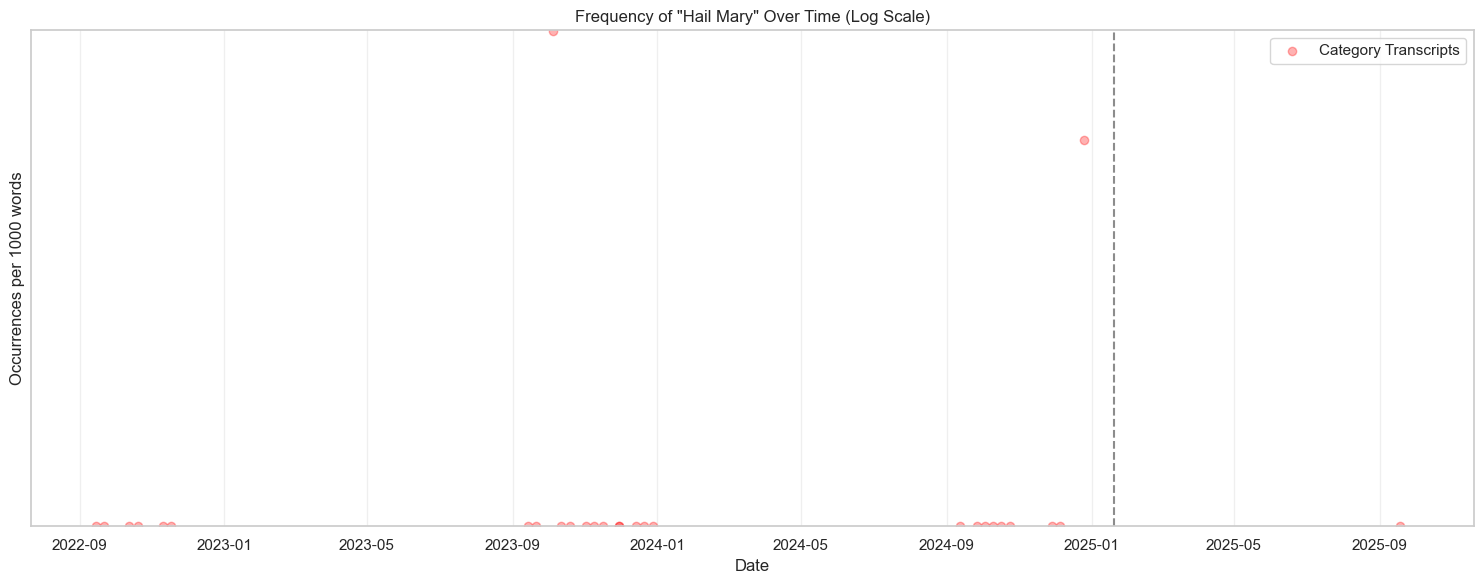


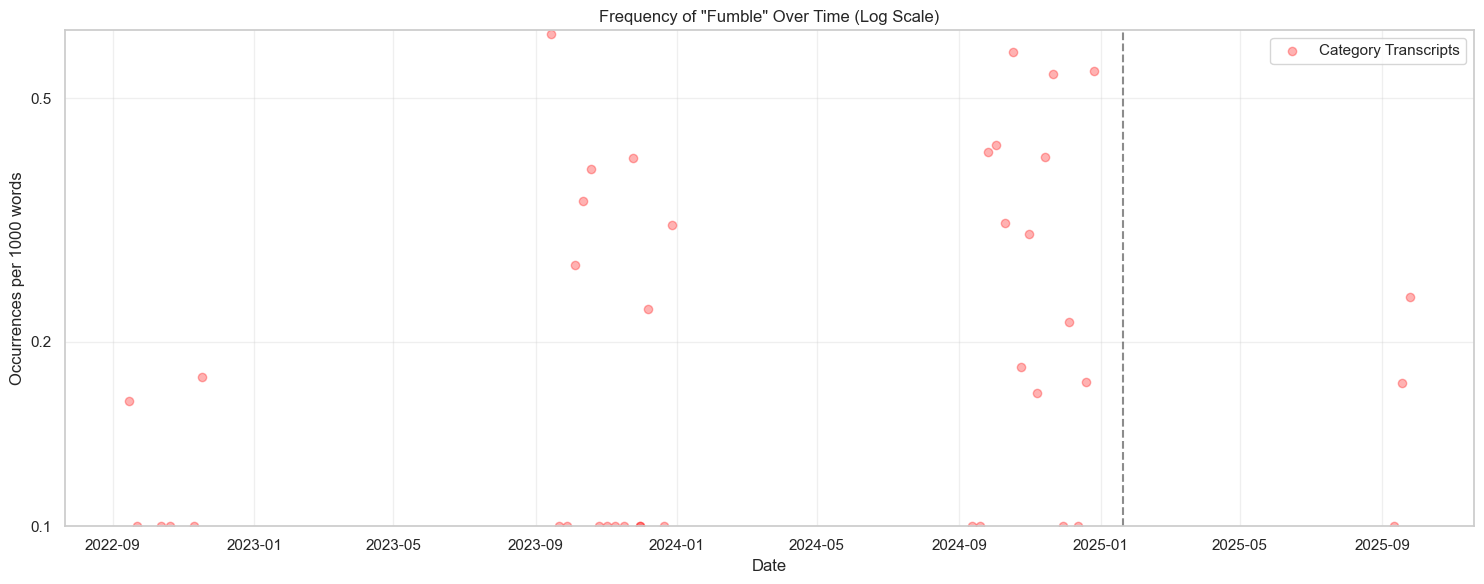


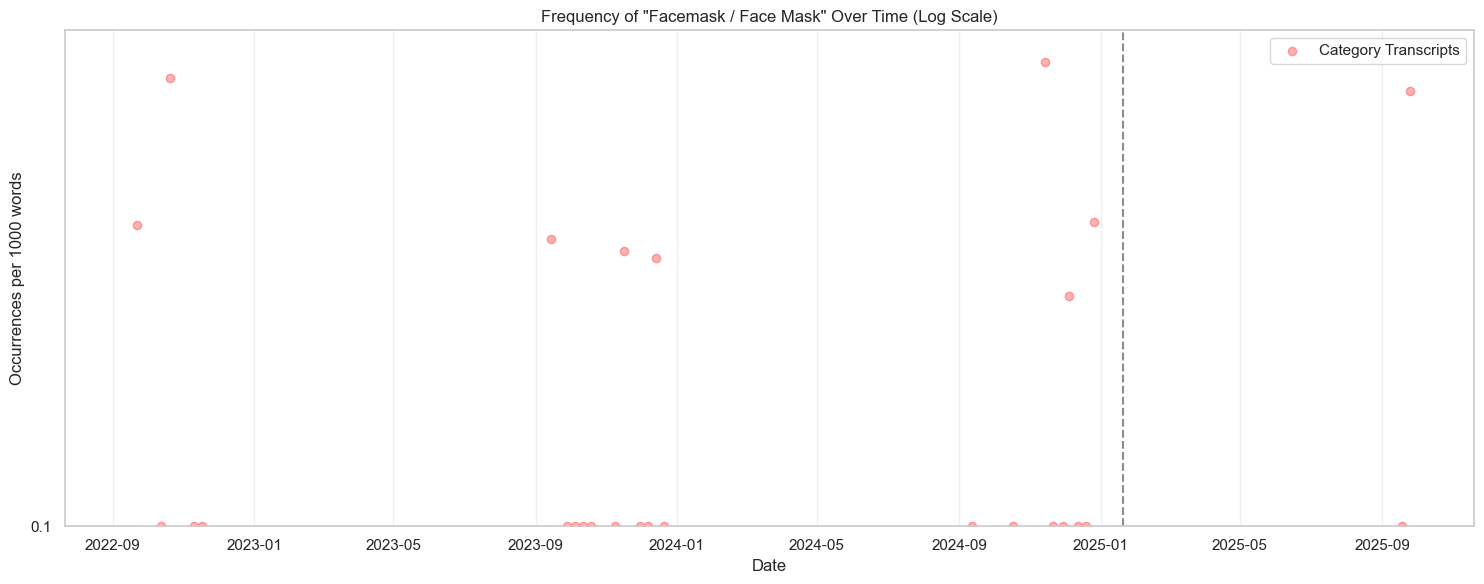


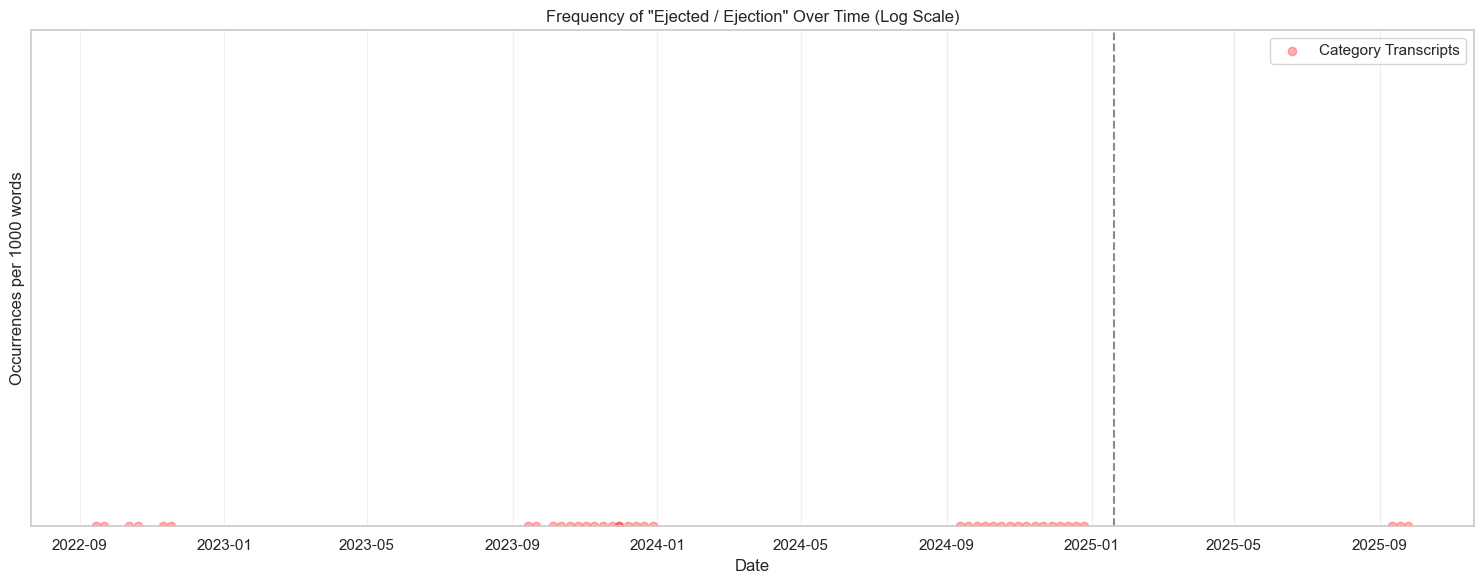


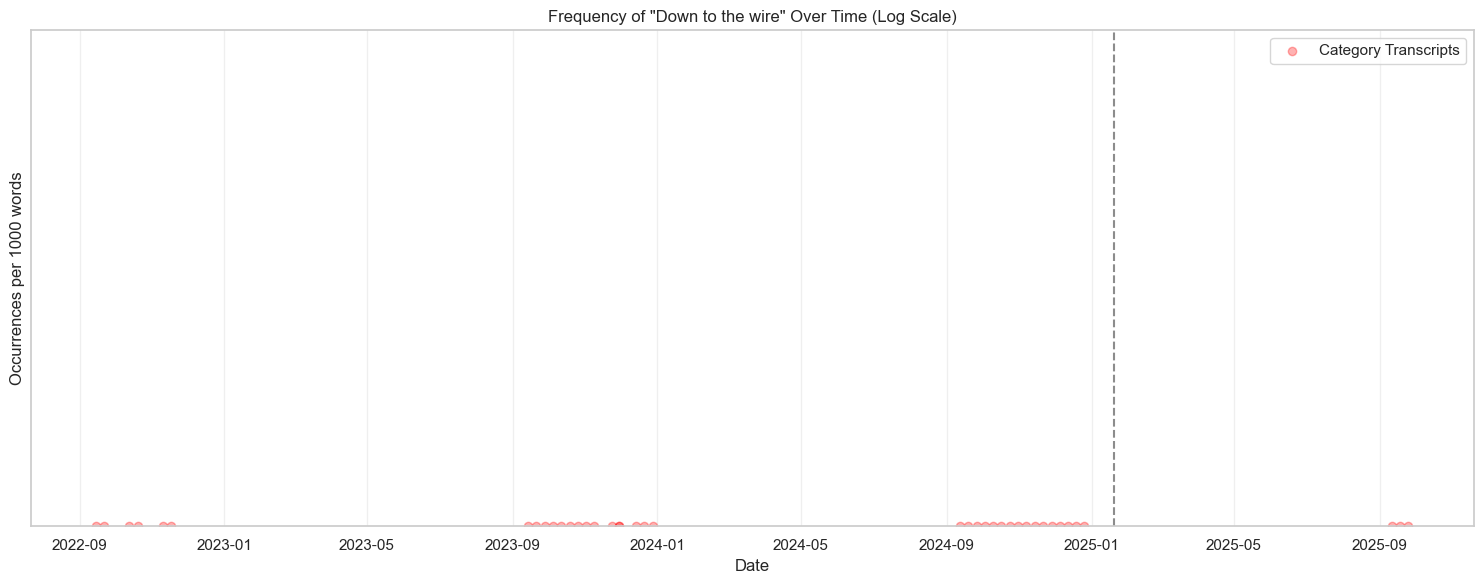


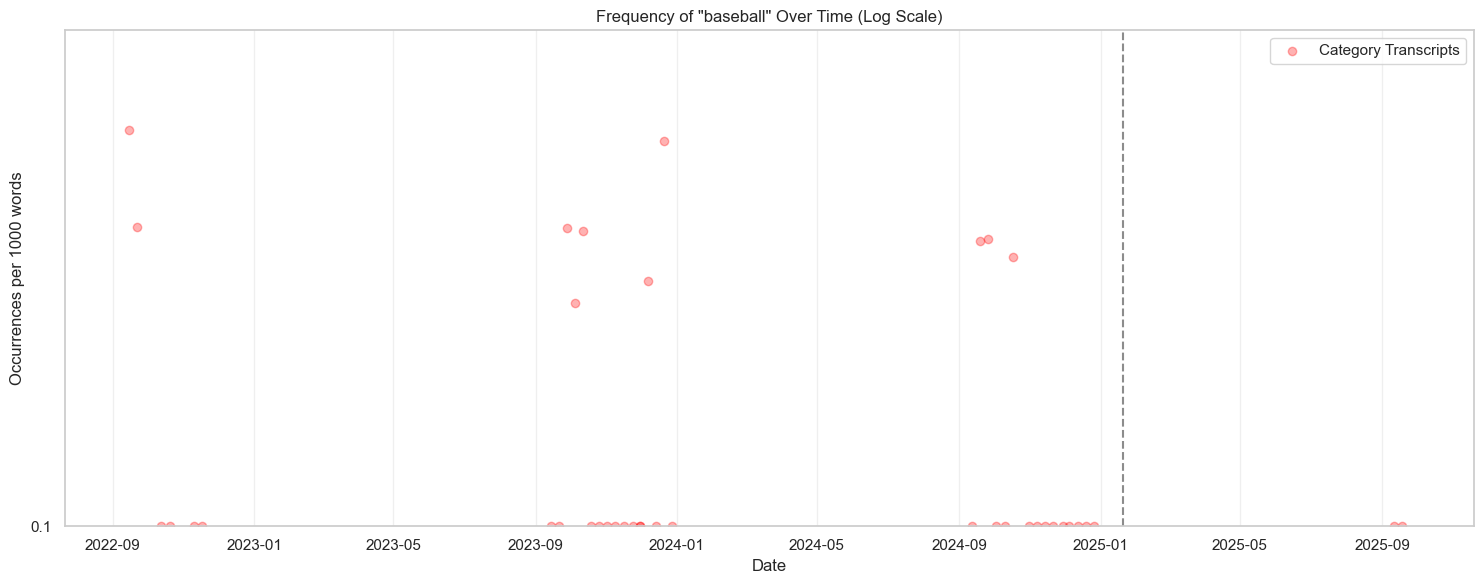


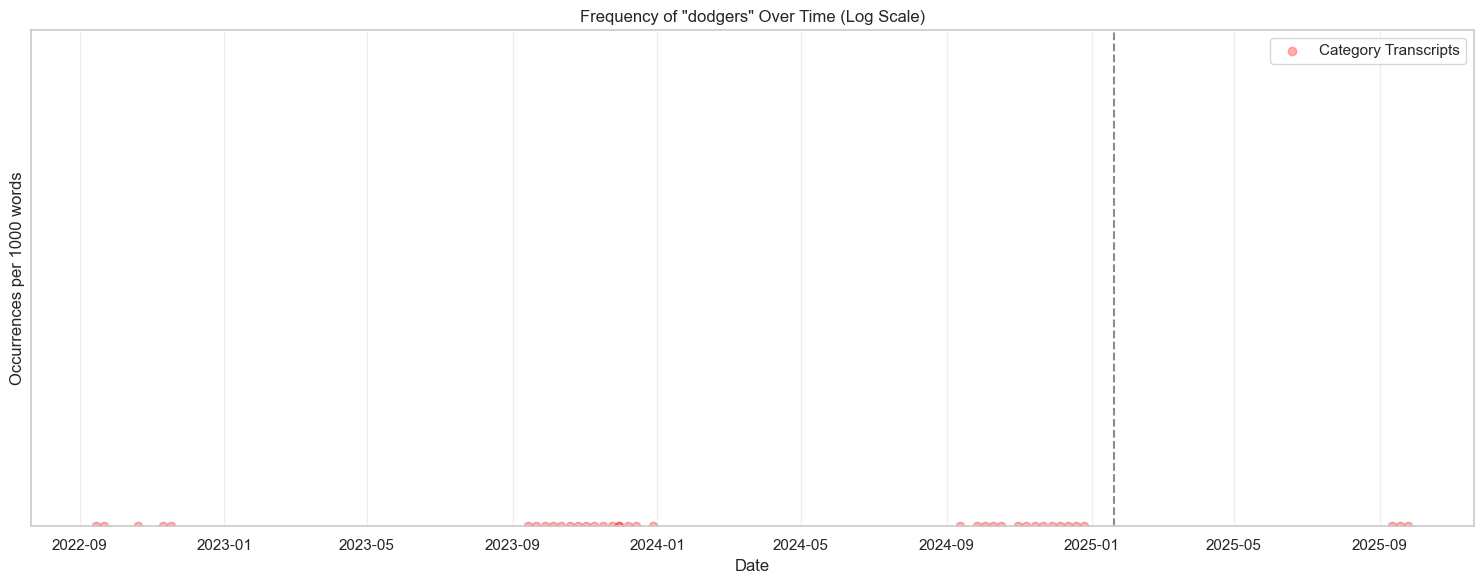

In [47]:
plot_phrase_frequency_over_time_all(df, phrases=SEARCH_PHRASES, log_scale=True, window=100, show_moving_average=False)

In [48]:
teams_df = df[df['file'].str.contains('san francisco|49ers|los angeles|rams', case=False, na=False)]
len(teams_df)


5

In [49]:
analyze_files_phrase_occurrences(teams_df, SEARCH_PHRASES)

Found 5 matching files:

  2023-12-21_Saints-at-Rams.txt
  2023-09-21_Giants-at-49Ers.txt
  2024-12-12_Rams-at-49Ers.txt
  2024-10-24_Vikings-at-Rams.txt
  2024-10-10_49Ers-at-Seahawks.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:552: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows[sort_columns].sum(axis=1)


,2023-12-21_Saints-at-Rams.txt,2023-09-21_Giants-at-49Ers.txt,2024-12-12_Rams-at-49Ers.txt,2024-10-24_Vikings-at-Rams.txt,2024-10-10_49Ers-at-Seahawks.txt,Average
Word Count,26011,24159,16018,12216,14106,18502.000000
Safety,16,11,18,10,5,12.000000
Sack / Sacked,18,14,8,7,7,10.800000
Picked / Pick Six,12,19,6,3,3,8.600000
Facemask / Face Mask,0,7,0,4,3,2.800000
Speed,3,4,2,0,2,2.200000
Wild,9,0,0,0,1,2.000000
Tie,4,0,3,1,0,1.600000
dodgers,2,0,0,4,0,1.200000
baseball,3,0,0,3,0,1.200000



Summary:
Total files processed: 5
Total word count: 92,510


In [51]:
analyze_files_phrase_occurrences(df[df['file'] == '2025-09-25_seahawks-at-cardinals-1.txt'], SEARCH_PHRASES)

Found 1 matching files:

  2025-09-25_seahawks-at-cardinals-1.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:552: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows[sort_columns].sum(axis=1)


,2025-09-25_seahawks-at-cardinals-1.txt
Word Count,14633
Sack / Sacked,7
Safety,7
Picked / Pick Six,5
baseball,4
Overtime,3
Speed,2
Facemask / Face Mask,2
Fumble,2
Hail Mary,2



Summary:
Total files processed: 1
Total word count: 14,633


Expected length from category data: 17332 words


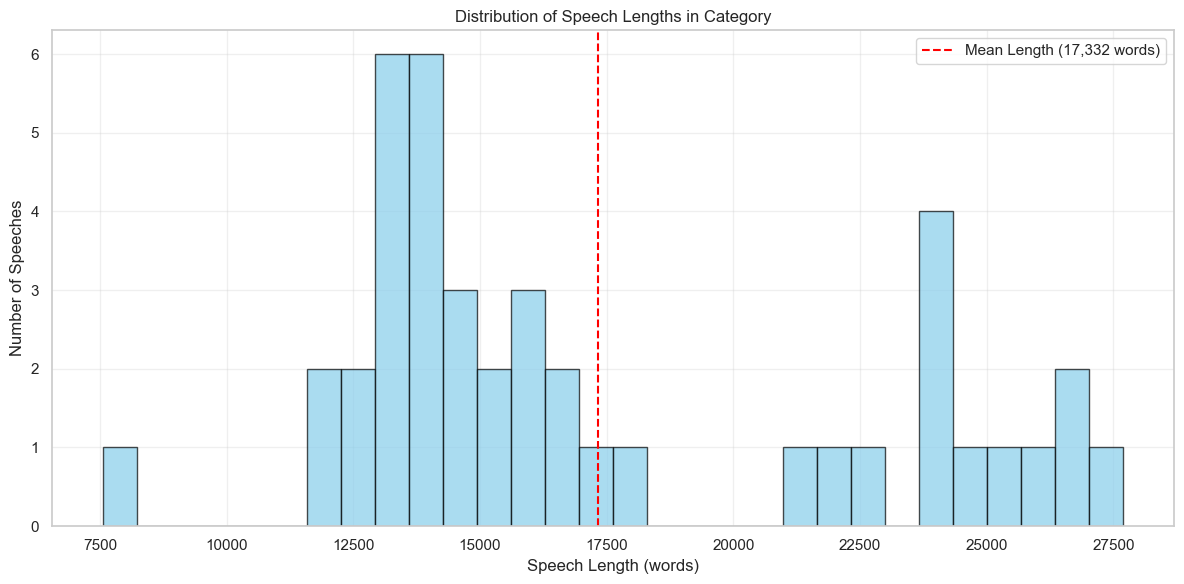

5 shortest transcripts by word count:


,file,date,text_length
12,2023-11-30_Seahawks-at-Cowboys-incomplete.txt,2023-11-30,7567
28,2025-09-11_commanders-at-packers.txt,2025-09-11,12135
33,2024-10-24_Vikings-at-Rams.txt,2024-10-24,12216
19,2023-09-28_Lions-at-Packers.txt,2023-09-28,12323
14,2023-10-12_Broncos-at-Chiefs.txt,2023-10-12,12499


In [46]:
plot_length_distribution(df)
# Print the 5 shortest transcripts by word count
print("5 shortest transcripts by word count:")
display(df.nsmallest(5, 'text_length')[['file', 'date', 'text_length']])


In [ ]:
length = 1681

## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [ ]:
# Calculate predictions from different data sources
print("using length: ", length)
predictions_all = calculate_poisson_predictions(df, length, SEARCH_PHRASES)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all))

predictions_recent = calculate_poisson_predictions(df_recent, length, SEARCH_PHRASES)

print("Predictions based on recent appearances:")
display(format_prediction_table(predictions_recent))


using length:  1681
Predictions based on all appearances:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
15,Drone,3.70,2.198,526,97.5%
6,Putin,2.43,1.446,346,91.2%
10,Missile,2.31,1.375,329,90.1%
13,Fund / Funding,1.21,0.719,172,70.1%
19,Ceasefire,1.02,0.606,145,63.9%
12,Future,0.98,0.581,139,62.3%
1,Unity,0.93,0.552,132,60.4%
3,Trump,0.82,0.485,116,55.7%
4,Soldier,0.62,0.368,88,46.1%
9,Mission,0.24,0.142,34,21.2%


Predictions based on recent appearances:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
15,Drone,4.24,2.519,67,98.6%
6,Putin,3.92,2.331,62,98.0%
10,Missile,1.83,1.090,29,84.0%
13,Fund / Funding,1.83,1.090,29,84.0%
3,Trump,1.71,1.015,27,81.9%
19,Ceasefire,0.63,0.376,10,46.9%
12,Future,0.51,0.301,8,39.7%
9,Mission,0.19,0.113,3,17.3%
1,Unity,0.13,0.075,2,11.9%
16,Donbas,0.13,0.075,2,11.9%


## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

In [ ]:
print("using length: ", length)

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions))

print("Negative Binomial Predictions based on recent appearances:")
nb_predictions_recent = calculate_negative_binomial_predictions(df_recent, length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions_recent))


using length:  1681
Negative Binomial Predictions based on all appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
15,Drone,3.70,0.60,26.41,69.3%,0.426
6,Putin,2.43,0.61,12.06,62.6%,0.324
10,Missile,2.31,0.35,17.75,50.6%,0.270
13,Fund / Funding,1.21,0.31,5.93,38.9%,0.160
19,Ceasefire,1.02,0.15,7.78,26.8%,0.122
12,Future,0.98,0.48,2.96,41.3%,0.130
1,Unity,0.93,0.23,4.69,31.0%,0.121
3,Trump,0.82,0.26,3.39,30.8%,0.107
4,Soldier,0.62,0.13,3.51,20.5%,0.078
9,Mission,0.24,0.10,0.86,11.5%,0.028


Negative Binomial Predictions based on recent appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
15,Drone,4.24,1.09,20.75,82.2%,0.540
6,Putin,3.92,1.36,15.25,84.1%,0.542
10,Missile,1.83,1.40,4.23,69.0%,0.277
13,Fund / Funding,1.83,0.56,7.84,55.6%,0.253
3,Trump,1.71,0.70,5.84,58.0%,0.244
19,Ceasefire,0.63,0.51,1.42,33.6%,0.072
12,Future,0.51,0.38,1.18,27.5%,0.056
9,Mission,0.19,0.20,0.37,12.5%,0.015
1,Unity,0.13,0.10,0.35,7.8%,0.011
16,Donbas,0.13,100.00,0.10,11.9%,0.000


## Recent Usage in context

In [52]:
from importlib import reload
import src.phrase_analysis as phrase_analysis
reload(phrase_analysis)
get_recent_contexts_all = phrase_analysis.get_recent_contexts_all


get_recent_contexts_all(df, SEARCH_PHRASES, n=20)




=== Recent usage of 'Wild' ===

Title: 2024-12-26_Seahawks-at-Bears.txt
Date: 2024-12-26 (processed-captions)
Context: ...THEY'LL MARK IT CLOSER WHERE HE STARTED SLIDE AT THE 34, AND A TIMEOUT TAKEN HERE. TIMEOUT TAKEN HERE. TIMEOUT SEA 53 SECONDS LEFT IN THE HALF.th AND 12th, PRIME'S HALF.th AND 12th, PRIME'S EXCLUSIVE WILD CARD PLAYOFF GAME. FI FIRST PLAYOFF GAME EVER ON PRIME EVER ON PRIME VIDEO PART PART OF WILD CARD WEEKEND AND ONLY ON PRIME. SIX GAMES OF COURSE THAT WEEKEND. SATURDAY, SU MONDAY. MEAN WILE, MEAN WIL...

Title: 2024-12-26_Seahawks-at-Bears.txt
Date: 2024-12-26 (processed-captions)
Context: ...KEN HERE. TIMEOUT SEA 53 SECONDS LEFT IN THE HALF.th AND 12th, PRIME'S HALF.th AND 12th, PRIME'S EXCLUSIVE WILD CARD PLAYOFF GAME. FI FIRST PLAYOFF GAME EVER ON PRIME EVER ON PRIME VIDEO PART PART OF WILD CARD WEEKEND AND ONLY ON PRIME. SIX GAMES OF COURSE THAT WEEKEND. SATURDAY, SU MONDAY. MEAN WILE, MEAN WILE, IT'S RAINING HARDER THAN IT HAS ALL NIGHT. IT'S BEEN SPRINK IT'S

## Per-Speech Frequencies


In [53]:


get_per_appearance_frequency({'nfl': df_nfl, 'nfl_recent': nfl_recent, 'since_2017': df_nfl[df_nfl['date'] > datetime(2017, 1, 1)], 'teams': teams_df, 'tnf': df}, SEARCH_PHRASES)


Percentage of Appearances Containing Each Phrase:


,nfl,nfl_recent,since_2017,teams,tnf
# of files,601.00,208.00,114.00,5.0,42.00
Average word count,18021.14,19633.63,20373.91,18502.0,17332.26
Safety,96.67,99.52,100.00,100.0,97.62
Picked / Pick Six,94.51,97.60,98.25,100.0,100.00
Sack / Sacked,92.01,98.56,99.12,100.0,100.00
Speed,90.52,97.12,97.37,80.0,95.24
Fumble,83.03,83.65,84.21,40.0,57.14
Tie,74.21,75.00,66.67,60.0,57.14
Inch,58.24,56.25,57.02,20.0,59.52
Facemask / Face Mask,47.75,50.00,50.00,60.0,57.14
